In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8ab21aaa-0723-aba2-bfa5-d9bc99a023ea)


In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 37.41 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [ ]:
def get_lines(filename):
  '''
  reads filename (a text filename) and returns the lines of text as a list.
  '''
  with open(filename, 'r') as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir+'train.txt')
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ''
  abstract_samples = []

  for line in input_lines:
    if line.startswith('###'):
      abstract_id = line
      abstract_lines = ''
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split('\t')
        line_data['target'] = target_text_split[0]
        line_data['text'] = target_text_split[1].lower()
        line_data['line_number'] = abstract_line_number
        line_data['total_lines'] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line

  return abstract_samples

In [ ]:
  %%time
  train_samples = preprocess_text_with_line_numbers(data_dir + 'train.txt')
  val_samples = preprocess_text_with_line_numbers(data_dir + 'dev.txt')
  test_samples = preprocess_text_with_line_numbers(data_dir + 'test.txt')
  len(train_samples), len(val_samples), len(test_samples)

CPU times: user 369 ms, sys: 88.8 ms, total: 458 ms
Wall time: 457 ms


(180040, 30212, 30135)

In [ ]:
train_samples[:20]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(20)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

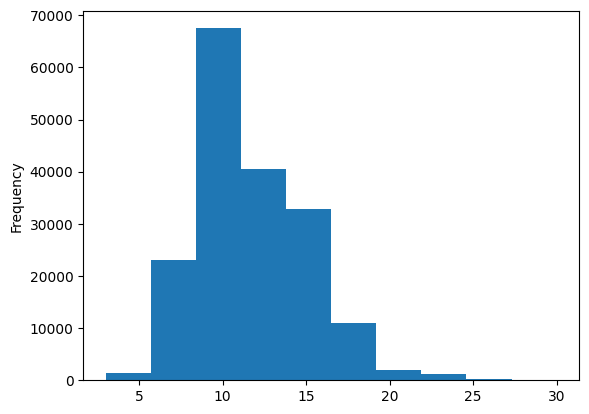

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_sentences = train_df['text'].tolist()
val_sentences = val_df['text'].tolist()
test_sentences = test_df['text'].tolist()
len(train_sentences)

180040

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df['target'].to_numpy().reshape(-1,1))
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df['target'].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_df['target'].to_numpy())
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

### Model 0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(X=train_sentences,
            y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-12-23 18:10:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-12-23 18:10:01 (106 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results = calculate_results(val_labels_encoded, baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

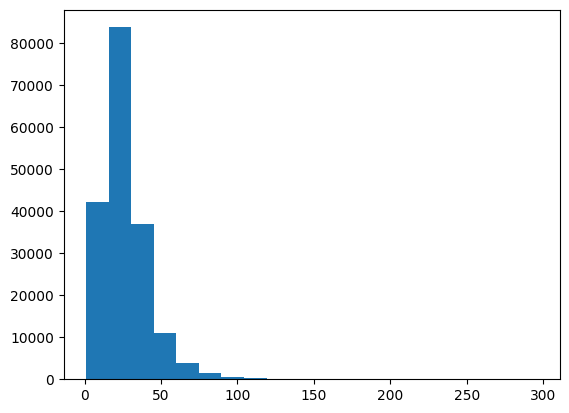

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=20)

In [ ]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
max(sent_lens)

296

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
max_tokens = 68000
text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_sequence_length=output_seq_len)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
target_sentence = random.choice(train_sentences)
print(f'Text:\n{target_sentence}')
print(f'\nLength of text: {len(target_sentence.split())}')
print(f'\nVectorized text: {text_vectorizer([target_sentence])}')

Text:
adjustment for age , gender , cranberry use , ltcf , length of stay , comorbidity and dementia showed similar results .

Length of text: 22

Vectorized text: [[ 1144    11   103  1005  8114    87 18441   523     4   603  3668     3
   1496   147   150   117     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f'Number of words in vocab: {len(rct_20k_text_vocab)}')
print(f'Most common: {rct_20k_text_vocab[:5]}')
print(f'Least common: {rct_20k_text_vocab[-5:]}')

Number of words in vocab: 64841
Most common: ['', '[UNK]', 'the', 'and', 'of']
Least common: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab),
                               output_dim=128,
                               mask_zero=True,
                               name='token_embedding')

In [ ]:
print(target_sentence)
vectorized_sentence = text_vectorizer([target_sentence])
print(vectorized_sentence)
embedded_sentence = token_embed(vectorized_sentence)
print(embedded_sentence)
print(embedded_sentence.shape)

adjustment for age , gender , cranberry use , ltcf , length of stay , comorbidity and dementia showed similar results .
tf.Tensor(
[[ 1144    11   103  1005  8114    87 18441   523     4   603  3668     3
   1496   147   150   117     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)
tf.Tensor(
[[[-0.01457276 -0.04232074  0.0052157  ... -0.00740719  0.02707319
    0.03565636]
  [-0.04152918  0.04358865  0.01078479 ...  0.0163557  -0.04854451
    0.0297146 ]
  [ 0.02630538 -0.01793877 -0.04855397 ...  0.01298729 -0.03120453
    0.03174101]
  ...
  [ 0.0020504  -0.01875552 -0.00964751 ...  0.04204626  0.0266675
    0.03313145]
  [ 0.0020504  -0.01875552 -0.00964751 ...  0.04204626  0.0266675
    0.03313145]
  [ 0.0020504  -0.01875552 -0.00964751 ...  0.04204626  0.0266675
  

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

### Model 1

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64,kernel_size=5, padding='same', activation='relu')(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation ='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 21s 32ms/step - loss: 0.9147 - accuracy: 0.6361 - val_loss: 0.6887 - val_accuracy: 0.7367
Epoch 2/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6587 - accuracy: 0.7571 - val_loss: 0.6294 - val_accuracy: 0.7726
Epoch 3/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6163 - accuracy: 0.7741 - val_loss: 0.5963 - val_accuracy: 0.7856


In [ ]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5969 - accuracy: 0.7878


[0.5969283580780029, 0.7877664566040039]

In [ ]:
model_1_pred_probs = model_1.predict(valid_dataset)

945/945 [==============================] - 2s 2ms/step


In [ ]:
model_1_pred_probs

array([[4.7131532e-01, 1.6183610e-01, 5.6508467e-02, 2.8192508e-01,
        2.8415129e-02],
       [4.1065755e-01, 3.0523095e-01, 1.2864238e-02, 2.6267534e-01,
        8.5718874e-03],
       [1.6579138e-01, 9.0941386e-03, 2.0033682e-03, 8.2306218e-01,
        4.8992013e-05],
       ...,
       [6.2042072e-06, 7.3420181e-04, 6.2754971e-04, 2.3842304e-06,
        9.9862969e-01],
       [5.6332141e-02, 4.6283621e-01, 8.4085792e-02, 6.2105186e-02,
        3.3464059e-01],
       [1.6573234e-01, 6.4613318e-01, 5.3731091e-02, 6.0797598e-02,
        7.3605828e-02]], dtype=float32)

In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
model_1_results = calculate_results(val_labels_encoded,
                                    model_1_preds)
model_1_results

{'accuracy': 78.77664504170528,
 'precision': 0.785026759797229,
 'recall': 0.7877664504170528,
 'f1': 0.7855386698662163}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_results = calculate_results(val_labels_encoded,
                                    model_1_preds)

945/945 [==============================] - 3s 3ms/step


In [ ]:
model_1_results

{'accuracy': 78.77664504170528,
 'precision': 0.785026759797229,
 'recall': 0.7877664504170528,
 'f1': 0.7855386698662163}

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        trainable=False,
                                        name='universal_sentence_encoder')

In [ ]:
random_train_sentence = random.choice(train_sentences)
print(f'Random Sentence:\n {random_train_sentence}')
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f'Sentence after embedding:\n {use_embedded_sentence[0][:30]}')
print(f'Length of sentence embedding: {len(use_embedded_sentence[0])}')

Random Sentence:
 in essence , it posits that a question can be mentally held in a person 's mind , sometimes while they are holding a substance like a vitamin , or a food sample , and by measuring relative muscular weakness an answer as to whether the substance or the condition represented by the question is good for that person can be obtained .
Sentence after embedding:
 [-0.02495206 -0.01771063 -0.01071085  0.03561199  0.05812889  0.03597508
  0.03114209 -0.03649786 -0.01537086  0.06822361  0.05184646  0.04907432
  0.0025862   0.05716003 -0.06133724 -0.09011391 -0.0839355   0.03102935
  0.01495221 -0.039357    0.05075752 -0.05248682 -0.02701982  0.00358212
  0.04927375 -0.00810986 -0.07100203 -0.03390954  0.01846672 -0.0163276 ]
Length of sentence embedding: 512


In [ ]:
inputs = layers.Input(shape=[], dtype=tf.string)
use_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation ='relu')(use_embedding)
outputs = layers.Dense(num_classes, activation ='softmax')(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2_history = model_2.fit(train_dataset,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 11s 13ms/step - loss: 0.9194 - accuracy: 0.6516 - val_loss: 0.7932 - val_accuracy: 0.6888
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.7658 - accuracy: 0.7025 - val_loss: 0.7522 - val_accuracy: 0.7055
Epoch 3/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7484 - accuracy: 0.7137 - val_loss: 0.7358 - val_accuracy: 0.7108


In [ ]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_results = calculate_results(val_labels_encoded,
                                    model_2_preds)
model_2_results

945/945 [==============================] - 10s 11ms/step


{'accuracy': 71.44181120084735,
 'precision': 0.7146205529146781,
 'recall': 0.7144181120084735,
 'f1': 0.7115690181602866}

In [ ]:
def split_chars(text):
  return ' '.join(list(text))

split_chars(random_train_sentence)

NameError: ignored

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

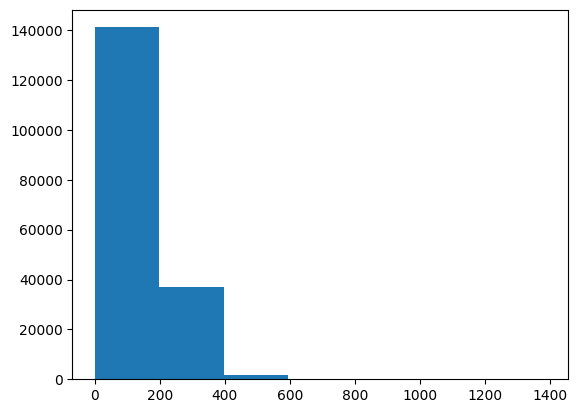

In [ ]:
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7)

In [ ]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation

In [ ]:
NUM_CHAR_TOKENS = len(alphabet) + 2 # space and OOV token ([UNK])
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    name='char_vectorizer')

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
print(f'Number of different characters in character vocab: {len(char_vocab)}')
print(f'5 most common chars: {char_vocab[:5]}')
print(f'5 least common chars: {char_vocab[-5:]}')

Number of different characters in character vocab: 28
5 most common chars: ['', '[UNK]', 'e', 't', 'i']
5 least common chars: ['k', 'x', 'z', 'q', 'j']


In [ ]:
random_train_chars = random.choice(train_chars)
print(f'Charified text:\n {random_train_chars}')
print(f'\nLength of random_train_chars: {len(random_train_chars.split())}')
vectorized_chars = char_vectorizer([random_train_chars])
print(f'\nVectorized chars:\n {vectorized_chars}')
print(f'\nLength of Vectorized chars: {len(vectorized_chars[0])}')

Charified text:
 t h e   p r i m a r y   o u t c o m e   o c c u r r e d   i n   @   p a t i e n t s   (   @   %   )   i n   t h e   b e n z n i d a z o l e   g r o u p   a n d   i n   @   (   @   %   )   i n   t h e   p l a c e b o   g r o u p   (   h a z a r d   r a t i o   ,   @   ;   @   %   c o n f i d e n c e   i n t e r v a l   - l s b -   c i   - r s b -   ,   @   t o   @   ;   p   =   @   )   .

Length of random_train_chars: 147

Vectorized chars:
 [[ 3 13  2 14  8  4 15  5  8 19  7 16  3 11  7 15  2  7 11 11 16  8  8  2
  10  4  6 14  5  3  4  2  6  3  9  4  6  3 13  2 22  2  6 25  6  4 10  5
  25  7 12  2 18  8  7 16 14  5  6 10  4  6  4  6  3 13  2 14 12  5 11  2
  22  7 18  8  7 16 14 13  5 25  5  8 10  8  5  3  4  7 11  7  6 17  4 10
   2  6 11  2  4  6  3  2  8 21  5 12 12  9 22 11  4  8  9 22  3  7 14  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0 

In [ ]:
char_embed = layers.Embedding(input_dim=len(char_vocab),
                              output_dim=25,
                              mask_zero=True,
                              name='char_embed')

In [ ]:
random_train_chars = random.choice(train_chars)
print(f'Charified text:\n {random_train_chars}')
print(f'\nLength of random_train_chars: {len(random_train_chars.split())}')
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f'\nEmbedded chars:\n {char_embed_example}')
print(f'\nChar Embedding shape: {char_embed_example.shape}')

Charified text:
 t h e   t r e a t m e n t   w a s   g i v e n   o n c e   a   d a y   ,   @   t i m e s   a s   o n e   s e s s i o n   ,   a n d   @   c o n s e c u t i v e   s e s s i o n s   w e r e   g i v e n   .

Length of random_train_chars: 81

Embedded chars:
 [[[ 0.03858582  0.03543142  0.00853236 ... -0.03186274  0.04135927
    0.02961009]
  [ 0.02195236 -0.00072836  0.01272212 ... -0.02522864 -0.0296301
    0.00385271]
  [-0.02877073 -0.01730042  0.03309912 ...  0.03022485 -0.03008577
    0.00360347]
  ...
  [-0.00835476  0.00116001 -0.0257962  ... -0.00981041  0.03482035
    0.02794321]
  [-0.00835476  0.00116001 -0.0257962  ... -0.00981041  0.03482035
    0.02794321]
  [-0.00835476  0.00116001 -0.0257962  ... -0.00981041  0.03482035
    0.02794321]]]

Char Embedding shape: (1, 290, 25)


In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
char_vectors = char_vectorizer(inputs)
char_embeds = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(char_embeds)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name='model_3_conv1d_char_embeddings')

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1*len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 5s 7ms/step - loss: 1.2459 - accuracy: 0.5073 - val_loss: 1.0435 - val_accuracy: 0.5918
Epoch 2/3
562/562 [==============================] - 4s 8ms/step - loss: 1.0028 - accuracy: 0.6010 - val_loss: 0.9487 - val_accuracy: 0.6330
Epoch 3/3
562/562 [==============================] - 3s 6ms/step - loss: 0.9328 - accuracy: 0.6309 - val_loss: 0.8786 - val_accuracy: 0.6596


In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_results = calculate_results(val_labels_encoded,
                                    model_3_preds)
model_3_results

945/945 [==============================] - 3s 3ms/step


{'accuracy': 64.84509466437177,
 'precision': 0.6457947933310197,
 'recall': 0.6484509466437177,
 'f1': 0.6377085056631053}

### Model 4

In [ ]:
token_inputs = layers.Input(shape=[],dtype=tf.string, name='token_input')
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128,activation='relu')(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_output)


char_inputs = layers.Input(shape=(1,), dtype=tf.string, name='char_input')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)


token_char_concat = layers.Concatenate(name='token_char_hybrid')([token_model.output,
                                                                  char_model.output])


combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128,activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation='softmax')(final_dropout)


model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name='model_4_token_and_char_embeddings')

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

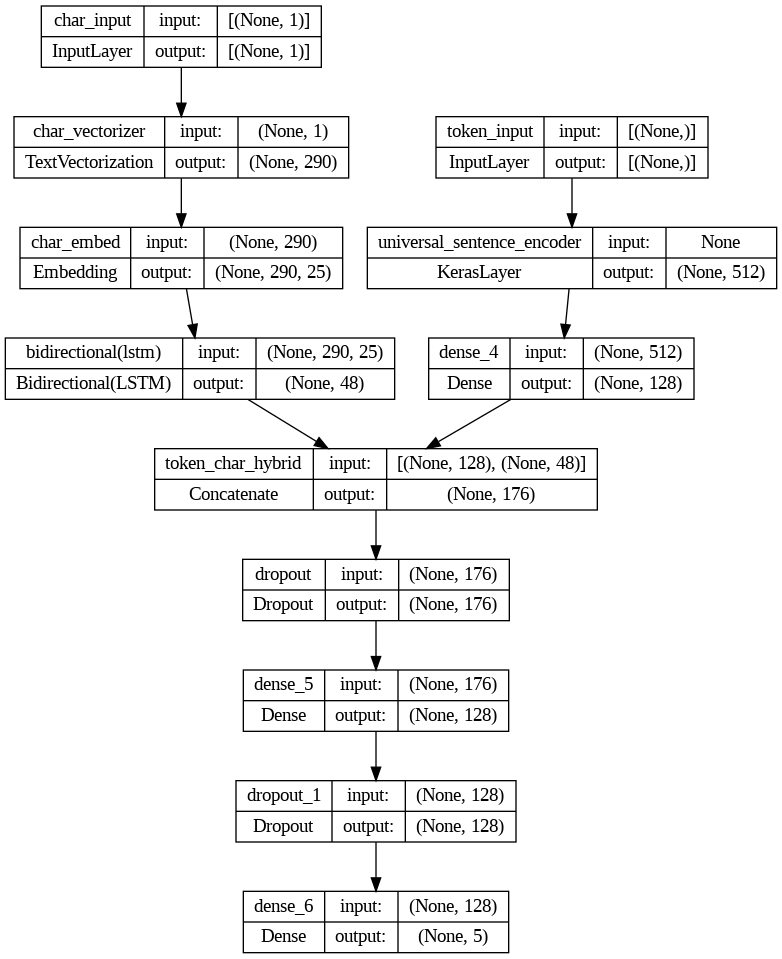

In [ ]:
from keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [ ]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_dataset = tf.data.Dataset.zip((test_char_token_data, test_char_token_labels))

test_char_token_dataset = test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
model_4_history = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 44s 58ms/step - loss: 0.9838 - accuracy: 0.6117 - val_loss: 0.7820 - val_accuracy: 0.7001
Epoch 2/3
562/562 [==============================] - 37s 66ms/step - loss: 0.8019 - accuracy: 0.6892 - val_loss: 0.7156 - val_accuracy: 0.7297
Epoch 3/3
562/562 [==============================] - 25s 44ms/step - loss: 0.7767 - accuracy: 0.7050 - val_loss: 0.6921 - val_accuracy: 0.7404


In [ ]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_results = calculate_results(val_labels_encoded,
                                    model_4_preds)
model_4_results

945/945 [==============================] - 22s 20ms/step


{'accuracy': 73.407917383821,
 'precision': 0.7328039665528847,
 'recall': 0.73407917383821,
 'f1': 0.7325916232744583}

### Model 5

In [ ]:
train_df['line_number'].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

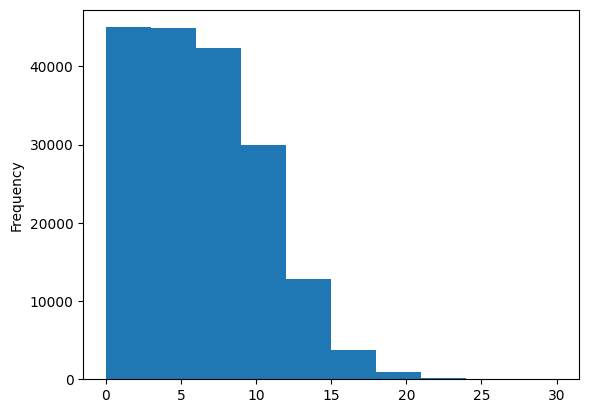

In [ ]:
train_df.line_number.plot.hist()

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df['line_number'].to_numpy(),depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df['line_number'].to_numpy(),depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df['line_number'].to_numpy(),depth=15)
train_line_numbers_one_hot[:10], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

In [ ]:
train_total_line_numbers_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(),depth=20)
val_total_line_numbers_one_hot = tf.one_hot(val_df['total_lines'].to_numpy(),depth=20)
test_total_line_numbers_one_hot = tf.one_hot(test_df['total_lines'].to_numpy(),depth=20)

In [ ]:
token_inputs = layers.Input(shape=[], dtype=tf.string)
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

char_inputs = layers.Input(shape=(1,), dtype='string', name='char_inputs')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

line_number_inputs = layers.Input(shape=(15), dtype=tf.float32)
line_number_outputs = layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_line_number_inputs = layers.Input(shape=(20), dtype=tf.float32)
total_line_number_outputs = layers.Dense(32, activation='relu')(total_line_number_inputs)
total_line_number_model = tf.keras.Model(total_line_number_inputs, total_line_number_outputs)

combined_embeddings = layers.Concatenate(name='char_token_hybrid_embedding')([token_model.output,
                                                                              char_model.output])

z = layers.Dense(256, activation='relu')(combined_embeddings)
z = layers.Dropout(0.5)(z)

tribrid_embeddings = layers.Concatenate(name='char_token_positional_embedding')([line_number_model.output,
                                                                                 total_line_number_model.output,
                                                                                 z])

output_layer = layers.Dense(5, activation='softmax', name='output_layer')(tribrid_embeddings)

model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_number_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

In [ ]:
model_5.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['input_10[0][0]']     

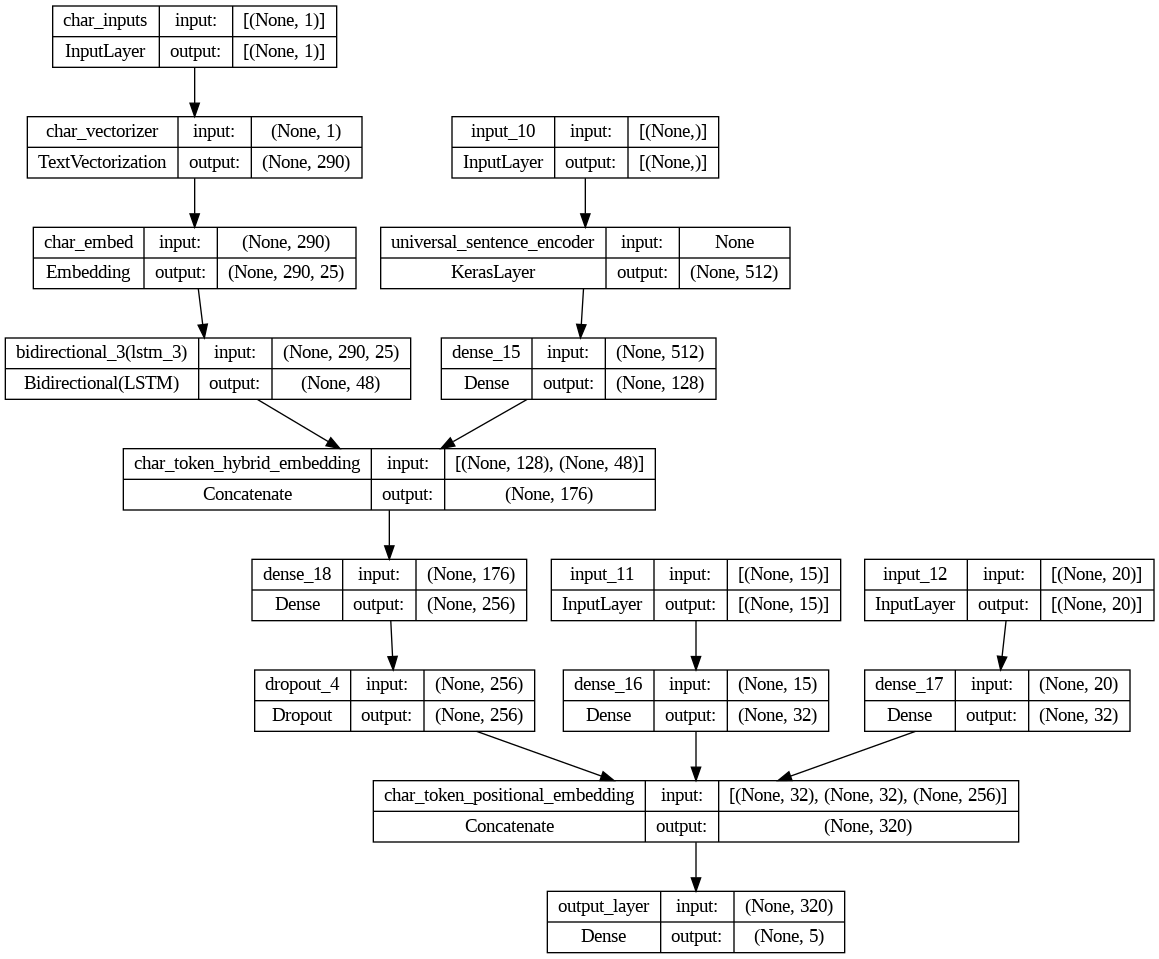

In [ ]:
plot_model(model_5, show_shapes=True)

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
train_char_token_line_number_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, train_total_line_numbers_one_hot, train_sentences, train_chars))
train_char_token_line_number_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_line_number_dataset = tf.data.Dataset.zip((train_char_token_line_number_data, train_char_token_line_number_labels))

train_char_token_line_number_dataset = train_char_token_line_number_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_line_number_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot, val_total_line_numbers_one_hot, val_sentences, val_chars))
val_char_token_line_number_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_line_number_dataset = tf.data.Dataset.zip((val_char_token_line_number_data, val_char_token_line_number_labels))

val_char_token_line_number_dataset = val_char_token_line_number_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_line_number_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot, test_total_line_numbers_one_hot, test_sentences, test_chars))
test_char_token_line_number_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_line_number_dataset = tf.data.Dataset.zip((test_char_token_line_number_data, test_char_token_line_number_labels))

test_char_token_line_number_dataset = test_char_token_line_number_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_5.fit(train_char_token_line_number_dataset,
            steps_per_epoch=int(0.1*len(train_char_token_line_number_dataset)),
            epochs=3,
            validation_data=val_char_token_line_number_dataset,
            validation_steps=int(0.1*len(val_char_token_line_number_dataset)))

Epoch 1/3
562/562 [==============================] - 40s 53ms/step - loss: 1.0916 - accuracy: 0.7284 - val_loss: 0.9827 - val_accuracy: 0.8059
Epoch 2/3
562/562 [==============================] - 28s 50ms/step - loss: 0.9650 - accuracy: 0.8173 - val_loss: 0.9488 - val_accuracy: 0.8305
Epoch 3/3
562/562 [==============================] - 26s 47ms/step - loss: 0.9484 - accuracy: 0.8240 - val_loss: 0.9393 - val_accuracy: 0.8291


In [ ]:
model_5_pred_probs = model_5.predict(val_char_token_line_number_dataset)
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_results = calculate_results(val_labels_encoded,
                                    model_5_preds)
model_5_results

945/945 [==============================] - 22s 19ms/step


{'accuracy': 83.41718522441414,
 'precision': 0.8332543746168151,
 'recall': 0.8341718522441414,
 'f1': 0.8332565547923271}

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
!mkdir skimlit
!unzip skimlit_tribrid_model.zip -d skimlit

--2023-12-23 18:03:52--  https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962182847 (918M) [application/zip]
Saving to: ‘skimlit_tribrid_model.zip’

skimlit_tribrid_mod 100%[===================>] 917.61M  73.8MB/s    in 11s     

2023-12-23 18:04:04 (80.1 MB/s) - ‘skimlit_tribrid_model.zip’ saved [962182847/962182847]

Archive:  skimlit_tribrid_model.zip
   creating: skimlit/skimlit_tribrid_model/
  inflating: skimlit/skimlit_tribrid_model/keras_metadata.pb  
   creating: skimlit/skimlit_tribrid_model/assets/
 extracting: skimlit/skimlit_tribrid_model/fingerprint.pb  
   creating: skimlit/skimlit_tribrid_model/variables/
  inflating: skimlit/skimlit_tribrid_model/variables/variables.index  
  infla

In [ ]:
loaded_model = tf.keras.models.load_model('skimlit/skimlit_tribrid_model/')

In [ ]:
train_char_token_line_number_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, train_total_line_numbers_one_hot, train_sentences, train_chars))
train_char_token_line_number_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_line_number_dataset = tf.data.Dataset.zip((train_char_token_line_number_data, train_char_token_line_number_labels))

train_char_token_line_number_dataset = train_char_token_line_number_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_line_number_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot, val_total_line_numbers_one_hot, val_sentences, val_chars))
val_char_token_line_number_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_line_number_dataset = tf.data.Dataset.zip((val_char_token_line_number_data, val_char_token_line_number_labels))

val_char_token_line_number_dataset = val_char_token_line_number_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_line_number_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot, test_total_line_numbers_one_hot, test_sentences, test_chars))
test_char_token_line_number_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_line_number_dataset = tf.data.Dataset.zip((test_char_token_line_number_data, test_char_token_line_number_labels))

test_char_token_line_number_dataset = test_char_token_line_number_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_6_pred_probs = loaded_model.predict(val_char_token_line_number_dataset)
model_6_preds = tf.argmax(model_6_pred_probs, axis=1)
model_6_results = calculate_results(val_labels_encoded,
                                    model_6_preds)
model_6_results

945/945 [==============================] - 30s 24ms/step


{'accuracy': 83.03323182841254,
 'precision': 0.8290556618130785,
 'recall': 0.8303323182841255,
 'f1': 0.8294263092000485}

In [ ]:
model_6_pred_probs = loaded_model.predict(test_char_token_line_number_dataset)
model_6_preds = tf.argmax(model_6_pred_probs, axis=1)
model_6_results = calculate_results(test_labels_encoded,
                                    model_6_preds)
model_6_results

942/942 [==============================] - 17s 18ms/step


{'accuracy': 82.57176041148166,
 'precision': 0.8242659626849546,
 'recall': 0.8257176041148167,
 'f1': 0.8247141207593822}

In [ ]:
model_6_pred_probs

array([[0.29606265, 0.08308028, 0.03647106, 0.5238846 , 0.0605014 ],
       [0.30677015, 0.07795963, 0.22224796, 0.3519172 , 0.04110508],
       [0.06126453, 0.02438156, 0.8024585 , 0.0765121 , 0.03538331],
       ...,
       [0.08204225, 0.07113038, 0.08104057, 0.07469936, 0.6910874 ],
       [0.06454715, 0.06645508, 0.08340038, 0.05865363, 0.72694373],
       [0.09589874, 0.5445649 , 0.13930309, 0.06724536, 0.1529879 ]],
      dtype=float32)

In [ ]:
import pandas as pd
f = pd.DataFrame(test_sentences)
f['BACKGROUND'] = [i[0] for i in model_6_pred_probs]
f['CONCLUSIONS'] = [i[1] for i in model_6_pred_probs]
f['METHODS'] = [i[2] for i in model_6_pred_probs]
f['OBJECTIVE'] = [i[3] for i in model_6_pred_probs]
f['RESULTS'] = [i[4] for i in model_6_pred_probs]
f['actual'] = [class_names[tf.argmax(i)] for i in test_labels_one_hot]
f['result'] = model_6_preds == tf.argmax(test_labels_one_hot, axis=1)

In [ ]:
f_false = f[f['result']== False]

In [ ]:
f_false = f_false.sort_values('actual')

In [ ]:
f_false[f_false['actual']=='BACKGROUND'].sort_values('BACKGROUND')[:10]

,0,BACKGROUND,CONCLUSIONS,METHODS,OBJECTIVE,RESULTS,actual,result
27247,behavioral activation therapy for rural vetera...,0.026714,0.619454,0.156490,0.040878,0.156464,BACKGROUND,False
29098,an active control arm received salmeterol ( sa...,0.027792,0.024888,0.897533,0.017564,0.032223,BACKGROUND,False
28426,the subgroup that was exposed first to filtere...,0.037247,0.134857,0.150542,0.046147,0.631207,BACKGROUND,False
13711,"before screening , all participants will be pr...",0.038324,0.312582,0.506255,0.038362,0.104477,BACKGROUND,False
29097,the primary endpoint was change from baseline ...,0.038805,0.006851,0.857253,0.029608,0.067482,BACKGROUND,False
8763,not relevant .,0.039611,0.193865,0.053002,0.042226,0.671297,BACKGROUND,False
162,there is a trial steering committee which incl...,0.040252,0.246501,0.145203,0.031202,0.536841,BACKGROUND,False
29099,all patients were maintained on a stable backg...,0.040283,0.038329,0.308252,0.030119,0.583018,BACKGROUND,False
10452,to validate the association between accommodat...,0.040306,0.017386,0.007377,0.918880,0.016052,BACKGROUND,False
7968,dpbrn hygienists internet quality improvement ...,0.041716,0.798296,0.027774,0.031613,0.100600,BACKGROUND,False


In [ ]:
f_false[f_false['actual']=='CONCLUSIONS'].sort_values('CONCLUSIONS')[:10]

,0,BACKGROUND,CONCLUSIONS,METHODS,OBJECTIVE,RESULTS,actual,result
13874,symptom outcomes will be assessed and estimate...,0.015885,0.008663,0.946719,0.020581,0.008152,CONCLUSIONS,False
25664,rifampicin significantly increased the mean ar...,0.032896,0.018473,0.053880,0.033855,0.860896,CONCLUSIONS,False
1827,nct@ ( clinicaltrials.gov ) .,0.906662,0.018718,0.028580,0.039492,0.006547,CONCLUSIONS,False
16633,clinicaltrials.gov identifier : nct@ .,0.910313,0.019131,0.018890,0.046959,0.004707,CONCLUSIONS,False
4391,-lsb- netherlands trial register ( http://www....,0.904828,0.022244,0.033323,0.033691,0.005914,CONCLUSIONS,False
14108,unique identifier : nct@ .,0.880742,0.022249,0.039763,0.049446,0.007801,CONCLUSIONS,False
16112,registration numbers : @-@-@ and @ ( http://pu...,0.863079,0.028857,0.045544,0.044174,0.018345,CONCLUSIONS,False
23656,"time until stable health status , length of ca...",0.035246,0.035949,0.046828,0.038840,0.843137,CONCLUSIONS,False
9467,total anaerobic counts of bacteria did not dif...,0.010269,0.039037,0.084066,0.030524,0.836103,CONCLUSIONS,False
9468,pdt was associated with a significant decrease...,0.020770,0.039446,0.022429,0.028573,0.888782,CONCLUSIONS,False


In [ ]:
f_false[f_false['actual']=='METHODS'].sort_values('METHODS')[:10]

,0,BACKGROUND,CONCLUSIONS,METHODS,OBJECTIVE,RESULTS,actual,result
671,to determine whether the insulin resistance th...,0.043353,0.036757,0.004640,0.889116,0.026135,METHODS,False
11021,this study provides class ii evidence that in ...,0.032565,0.849023,0.008652,0.077955,0.031805,METHODS,False
4593,this study provides class ii evidence that reg...,0.023016,0.899218,0.009620,0.036974,0.031172,METHODS,False
18901,this study provides class i evidence that for ...,0.034419,0.879993,0.010001,0.040076,0.035511,METHODS,False
9993,this study provides class i evidence that in p...,0.039334,0.844855,0.011564,0.055009,0.049238,METHODS,False
418,this study provides class i evidence that for ...,0.040095,0.850114,0.012390,0.045057,0.052345,METHODS,False
6666,"however , the study lacked the precision to ex...",0.037336,0.581362,0.012931,0.048473,0.319897,METHODS,False
3184,this study provides class iii evidence that cs...,0.057044,0.846808,0.013485,0.045891,0.036772,METHODS,False
16122,this study provides class i evidence that in p...,0.038360,0.794644,0.013783,0.062410,0.090803,METHODS,False
19224,"compared with the effects of placebo , maropit...",0.037981,0.229879,0.015713,0.055958,0.660469,METHODS,False


In [ ]:
f_false[f_false['actual']=='OBJECTIVE'].sort_values('OBJECTIVE')[:10]

,0,BACKGROUND,CONCLUSIONS,METHODS,OBJECTIVE,RESULTS,actual,result
24829,"one treatment took forty minutes , resulting i...",0.012342,0.015084,0.060990,0.023105,0.888478,OBJECTIVE,False
21382,"design , settings , participants , and interve...",0.026564,0.015394,0.886216,0.024484,0.047342,OBJECTIVE,False
22736,"the national institute of oncology , budapest ...",0.047094,0.026966,0.842971,0.025939,0.057031,OBJECTIVE,False
2520,the two population groups were randomly separa...,0.021692,0.047555,0.365437,0.027539,0.537778,OBJECTIVE,False
24828,these groups were treated with the frequencies...,0.016392,0.049175,0.451083,0.027620,0.455730,OBJECTIVE,False
24827,and group d ( @ pts . ),0.033061,0.047888,0.678309,0.032222,0.208519,OBJECTIVE,False
24826,", group c ( @ pts . )",0.042652,0.015858,0.815203,0.033304,0.092982,OBJECTIVE,False
2523,a total of @ people ( @ % ) were diagnosed to ...,0.033647,0.120815,0.081481,0.034510,0.729547,OBJECTIVE,False
24788,challenges included how to randomize the deliv...,0.069673,0.078220,0.722857,0.040404,0.088845,OBJECTIVE,False
16580,"second , we collected patient-reported outcome...",0.046294,0.013272,0.882723,0.040417,0.017294,OBJECTIVE,False


In [ ]:
f_false[f_false['actual']=='RESULTS'].sort_values('RESULTS')[:10]

,0,BACKGROUND,CONCLUSIONS,METHODS,OBJECTIVE,RESULTS,actual,result
3573,a cluster randomised trial was implemented wit...,0.043032,0.013426,0.914345,0.021791,0.007406,RESULTS,False
12134,we conducted a population-based case-control s...,0.092963,0.011038,0.840899,0.044962,0.010138,RESULTS,False
2388,the primary endpoint is the cumulative three-y...,0.031205,0.004923,0.928262,0.022614,0.012996,RESULTS,False
13488,we studied @ participants in the prevencin wit...,0.181091,0.027200,0.621014,0.156278,0.014417,RESULTS,False
18720,non-diffuse-trickling '' ) .,0.903670,0.018584,0.028579,0.033073,0.016093,RESULTS,False
2386,the hptn @ ( popart ) trial is a three-arm clu...,0.318359,0.035654,0.498939,0.129197,0.017850,RESULTS,False
12456,icd patients were randomized @:@ to automatic ...,0.054852,0.009657,0.849952,0.064069,0.021470,RESULTS,False
920,"@,@ infants aged @-@ wk and @,@ children aged ...",0.047581,0.010878,0.884702,0.034230,0.022609,RESULTS,False
28391,cox proportional hazards analyses were used to...,0.048593,0.014694,0.858851,0.054623,0.023239,RESULTS,False
2387,a combination prevention package including hom...,0.058738,0.019695,0.866000,0.031502,0.024065,RESULTS,False
